###### Time Series Package Imports

In [1]:
#  NumPy and Pandas imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#  Reading time series
from pandas_datareader import data

#  Time stamps
import datetime as datetime

#  Visualization (sns is a visualization library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


# Part 1: Getting The Data
-----------
## Remote Data Access
--------
The *pandas_datareader* package extracts data from an internet source into a DataFrame. This project
will use the Yahoo! Finance internet source.  

In [23]:
#  Stock tickers to retrieve historical index data
ticker_index_data = ['AMD', 'CSCO', 'INTC', 'MU', 'ORCL', 'QCOM']

start = '2017-10-10'
end = '2019-04-10'

for ticker in ticker_index_data:
    globals()[ticker] = data.get_data_yahoo(ticker, start, end)
                                                    #  Changed start to 1.5 years

### Discrete Stock Databases
The *historical stock quote* is retrieved as a database made up of tuples with 6 associated class labels.
Hence, a tuple is represented with a 6-dimensional attribute vector: (High, Low, Open, Close, Volume, Adj Close).

Attribute Information:

*   High: The highest share price for Date
*   Low: The lowest share price for Date
*   Open: The opening share price on Date
*   Close: The closing share price on Date
*   Volume: The number of shares traded on Date
*   Adj Close: The closing price adjusted for stock splits and dividends

The pandas DataFrame **.tail(n)** method displays the last *n* observed samples 

In [24]:
#  Five most recent rows of DataFrame
AMD.tail(3)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-09,28.379999,27.190001,28.240000,27.240000,75539800,27.240000
2019-04-10,28.120001,27.320000,27.459999,27.830000,64368100,27.830000
2019-04-11,28.049999,27.459999,27.809999,27.790001,44801200,27.790001


### Combined Stock Databases  
The pandas Series **concat()** method concatenates DataFrames into MultiIndex DataFrame.   

In [4]:
#  The "axis" param of 1 represents concatenating along the column axis. 
#  The "keys" param is a hierarchical index for each technology stock ticker.
tech_stocks = pd.concat([AMD, CSCO, INTC, MU, ORCL, QCOM], axis=1, keys=ticker_index_data)
tech_stocks.columns.names = ['Stock Ticker', 'Stock Description']
tech_stocks.columns


MultiIndex(levels=[['AMD', 'CSCO', 'INTC', 'MU', 'ORCL', 'QCOM'], ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']],
           codes=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]],
           names=['Stock Ticker', 'Stock Description'])

The pandas DataFrame **.head(n)** method to displays the first *n* observed samples

In [7]:
#  First five rows of DataFrame
tech_stocks.head(3)


Stock Ticker         AMD                                                CSCO  \
Stock Description   High    Low   Open  Close    Volume Adj Close       High   
Date                                                                           
2017-10-10         13.79  13.44  13.72  13.70  43304000     13.70  33.910000   
2017-10-11         13.96  13.61  13.62  13.88  38746600     13.88  33.630001   
2017-10-12         14.37  13.81  13.85  14.20  69874100     14.20  33.459999   

Stock Ticker                                        ...   ORCL             \
Stock Description        Low       Open      Close  ...   Open      Close   
Date                                                ...                     
2017-10-10         33.470001  33.880001  33.549999  ...  48.16  48.209999   
2017-10-11         33.250000  33.380001  33.590000  ...  48.16  48.279999   
2017-10-12         33.169998  33.259998  33.259998  ...  48.27  48.230000   

Stock Ticker                                   QCOM                        \
Stock Description      Volume  Adj Close       High        Low       Open   
Date                                                                        
2017-10-10         15630500.0  47.049263  53.900002  52.900002  52.950001   
2017-10-11         12588300.0  47.117577  54.380001  53.660000  53.790001   
2017-10-12         11715600.0  47.068783  54.180000  52.959999  53.880001   

Stock Ticker                                        
Stock Description      Close     Volume  Adj Close  
Date                                                
2017-10-10         53.869999  8761700.0  50.795612  
2017-10-11         54.119999  9427300.0  51.031349  
2017-10-12         53.000000  7062300.0  49.975266  

[3 rows x 36 columns]

## The Data Structure
A DataFrame is a relation where each row is a tuple and each column is an attribute,
similar to a table in a relational database. However, the DataFrame is strictly ordered. 

Linking the DataFrames together creates a MultiIndex DataFrame (Also called hierarchical index). This
gives the data structure a set number of dimensions. Discrete DataFrames were two dimensional, with attributes
and a row (dates) index. The MultiIndex obtains a date, attribute, and stock ticker dimension.    




The pandas DataFrame **.shape** attribute displays a database's dimensionality

In [8]:
#  Shape of single stock
AMD.shape

(378, 6)

In [10]:
#  Shape of group stocks
tech_stocks.shape

(378, 36)

The pandas DataFrame **.dtypes** attribute returns a series with the data type of
each column

In [17]:
#  Data type for each attribute of all stocks
tech_stocks.dtypes

Stock Ticker  Stock Description
AMD           High                 float64
              Low                  float64
              Open                 float64
              Close                float64
              Volume                 int64
              Adj Close            float64
CSCO          High                 float64
              Low                  float64
              Open                 float64
              Close                float64
              Volume               float64
              Adj Close            float64
INTC          High                 float64
              Low                  float64
              Open                 float64
              Close                float64
              Volume               float64
              Adj Close            float64
MU            High                 float64
              Low                  float64
              Open                 float64
              Close                float64
              Volume  

The pandas DataFrame **.index** attribute returns the index of DataFrame

In [18]:
tech_stocks.index

DatetimeIndex(['2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13',
               '2017-10-16', '2017-10-17', '2017-10-18', '2017-10-19',
               '2017-10-20', '2017-10-23',
               ...
               '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-03',
               '2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09',
               '2019-04-10', '2019-04-11'],
              dtype='datetime64[ns]', name='Date', length=378, freq=None)

The pandas DataFrame **.info()** method summarizes the data structure 

In [16]:
tech_stocks.transpose().info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, (AMD, High) to (QCOM, Adj Close)
Columns: 378 entries, 2017-10-10 to 2019-04-11
dtypes: float64(378)
memory usage: 106.8+ KB


## Descriptive Statistics
**Descriptive Statistics** are utilized to describe the features of data in a study. They are useful for 
examining the data before prepossessing for predictive analysis. univariate descriptive statistics describe
distribution, central tendency, dispersion, and shape for a single variable. 

The pandas Series' **.describe()** method generates a univariate analysis 

In [19]:
tech_stocks.describe()

Stock Ticker              AMD                                      \
Stock Description        High         Low        Open       Close   
count              378.000000  378.000000  378.000000  378.000000   
mean                17.925212   17.053095   17.494392   17.497381   
std                  6.445175    6.008648    6.237150    6.233647   
min                  9.770000    9.040000    9.080000    9.530000   
25%                 12.042500   11.562500   11.730000   11.812500   
50%                 16.850000   16.150000   16.510000   16.535000   
75%                 22.387500   21.122499   21.807500   22.062500   
max                 34.139999   32.189999   33.180000   32.720001   

Stock Ticker                                       CSCO              \
Stock Description        Volume   Adj Close        High         Low   
count              3.780000e+02  378.000000  378.000000  378.000000   
mean               7.927800e+07   17.497381   44.351429   43.520873   
std                4.433242e+07    6.233647    4.773399    4.701594   
min                1.103580e+07    9.530000   33.459999   33.169998   
25%                4.679845e+07   11.812500   42.477501   41.395000   
50%                6.578995e+07   16.535000   44.485001   43.580002   
75%                9.965758e+07   22.062500   47.122500   46.107499   
max                3.250584e+08   32.720001   55.950001   55.310001   

Stock Ticker                               ...        ORCL              \
Stock Description        Open       Close  ...        Open       Close   
count              378.000000  378.000000  ...  378.000000  378.000000   
mean                43.927645   43.942936  ...   48.770661   48.815714   
std                  4.735429    4.748134  ...    2.352138    2.379814   
min                 33.259998   33.259998  ...   43.000000   42.689999   
25%                 41.982500   42.022499  ...   47.242501   47.242499   
50%                 43.934999   44.014999  ...   48.629999   48.639999   
75%                 46.490000   46.672501  ...   50.235002   50.397501   
max                 55.930000   55.820000  ...   54.410000   54.580002   

Stock Ticker                                       QCOM              \
Stock Description        Volume   Adj Close        High         Low   
count              3.780000e+02  378.000000  378.000000  378.000000   
mean               1.713119e+07   48.119006   60.872064   59.521349   
std                8.005758e+06    2.457819    6.181522    6.129623   
min                6.008300e+06   42.125469   49.799999   48.560001   
25%                1.232412e+07   46.366159   55.992501   54.704999   
50%                1.517330e+07   47.922512   59.139999   57.925001   
75%                1.979278e+07   49.471994   65.755001   64.587500   
max                7.517600e+07   54.336658   76.500000   74.410004   

Stock Ticker                                                         
Stock Description        Open       Close        Volume   Adj Close  
count              378.000000  378.000000  3.780000e+02  378.000000  
mean                60.178545   60.177778  1.321758e+07   58.281514  
std                  6.134524    6.162590  7.722521e+06    5.798504  
min                 49.520000   49.400002  2.451300e+06   47.712498  
25%                 55.157499   55.270000  8.682200e+06   54.028797  
50%                 58.565001   58.655001  1.172295e+07   57.206200  
75%                 65.147501   65.194998  1.543420e+07   62.300900  
max                 75.370003   75.089996  8.096450e+07   73.429726  

[8 rows x 36 columns]

## Time Series Charts
### Share Price
##### Linear Graph:
**matplotlib** is used for plotting the DataFrame attributes as a function of DateTime indexes.

The pandas DataFrame **.xs** method is used for multi-level indexing

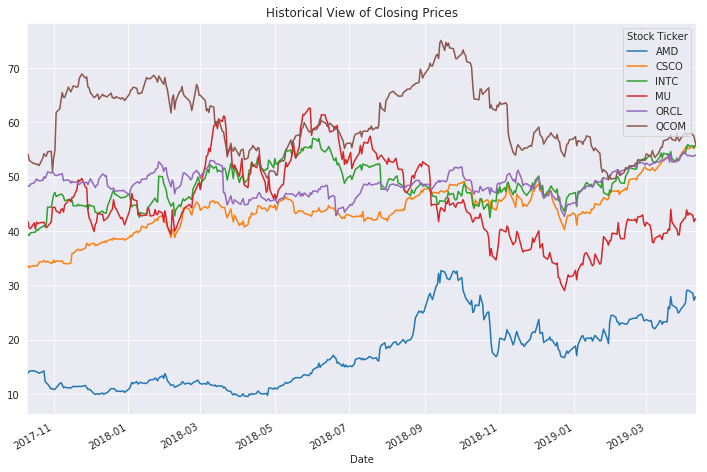

In [20]:
#  Display each stock's historical closing price time series 
tech_stocks.xs(key='Close', 
               axis=1, 
               level='Stock Description').plot(legend=True, 
                                               title='Historical View of Closing Prices',
                                               figsize=(12, 8))

##### Boxplot:
The ends of the box are quartiles, therefore the length of a box is the interquartile range. The median is
marked as a line within the box. The two lines outside the box (whiskers) extend to
the smallest (min) and largest (max) observations

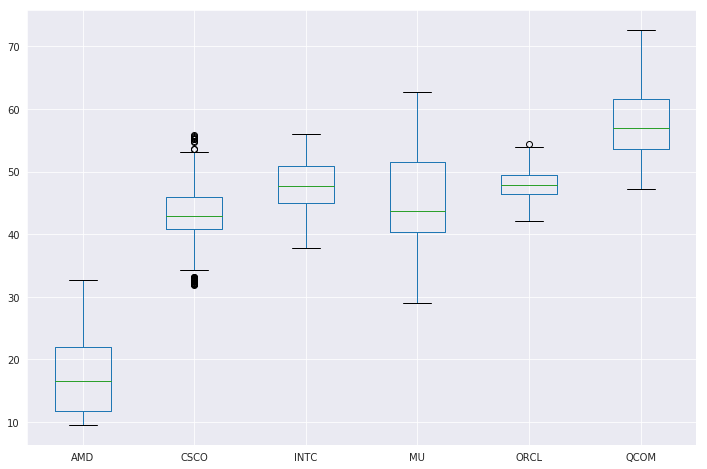

In [97]:
#  Display the distribution of each stock's closing price with a boxplot
tech_stocks.xs(key='Adj Close', 
               axis=1, 
               level='Stock Description').boxplot(column=ticker_index_data,
                                               grid=True,
                                               figsize=(12, 8)) 

### Log Scaled Trading Volume
##### Linear Graph:
NumPys **.log()** method is used to normalize the volume data with the logarithmic function.  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc328deb00>,
      dtype=object)

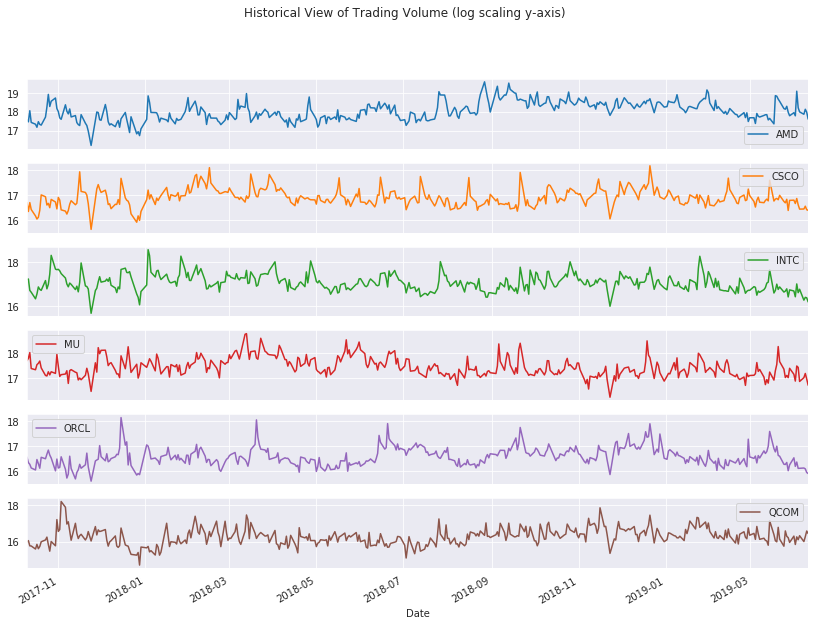

In [21]:
#  Display each stock's historical trading volume time series
log_volume = data.DataReader(ticker_index_data, 'yahoo', start, end)['Volume']
log_volume = np.log(log_volume)
log_volume.plot(legend=True, 
                title='Historical View of Trading Volume (log scaling y-axis)',
                subplots=True,
                figsize=(14, 10))

##### Boxplot:

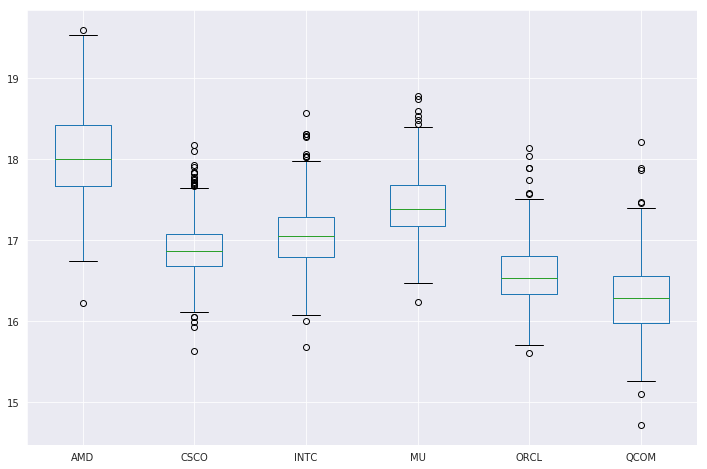

In [22]:
#  Display the (log scaled) distribution of each stock's trading volume
log_volume.boxplot(column=ticker_index_data,   
                   grid=True,
                   figsize=(12, 8))

## Conclusion:
